In [5]:
# Trying to predict Employee Attrition using Kaggle datset

import os
path =os.getcwd() # to find current path
path

'/Users/sandhya_ajay/Desktop/Machine-Learning-with-Python-master'

In [30]:
# data ingestion
import pandas as pd
hr_df = pd.read_csv('/Users/sandhya_ajay/Desktop/HR_comma_sep.csv')

In [32]:
# EDA
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,1,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,1,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,1,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,1,0,sales,low
4,0.37,0.52,2,159.0,3.0,0,1,0,sales,low


Rename the column name from "sales" to "department"

In [33]:
hr_df.rename(columns = {'sales':'department'}, inplace=True) # renaming wrong column name

In [34]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14998 non-null float64
last_evaluation          14998 non-null float64
number_project           14999 non-null int64
average_montly_hours     14977 non-null float64
time_spend_company       14993 non-null float64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14968 non-null object
salary                   14998 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [35]:
hr_df.isnull().any()

satisfaction_level        True
last_evaluation           True
number_project           False
average_montly_hours      True
time_spend_company        True
Work_accident            False
left                     False
promotion_last_5years    False
department                True
salary                    True
dtype: bool

Viewing missing values visually

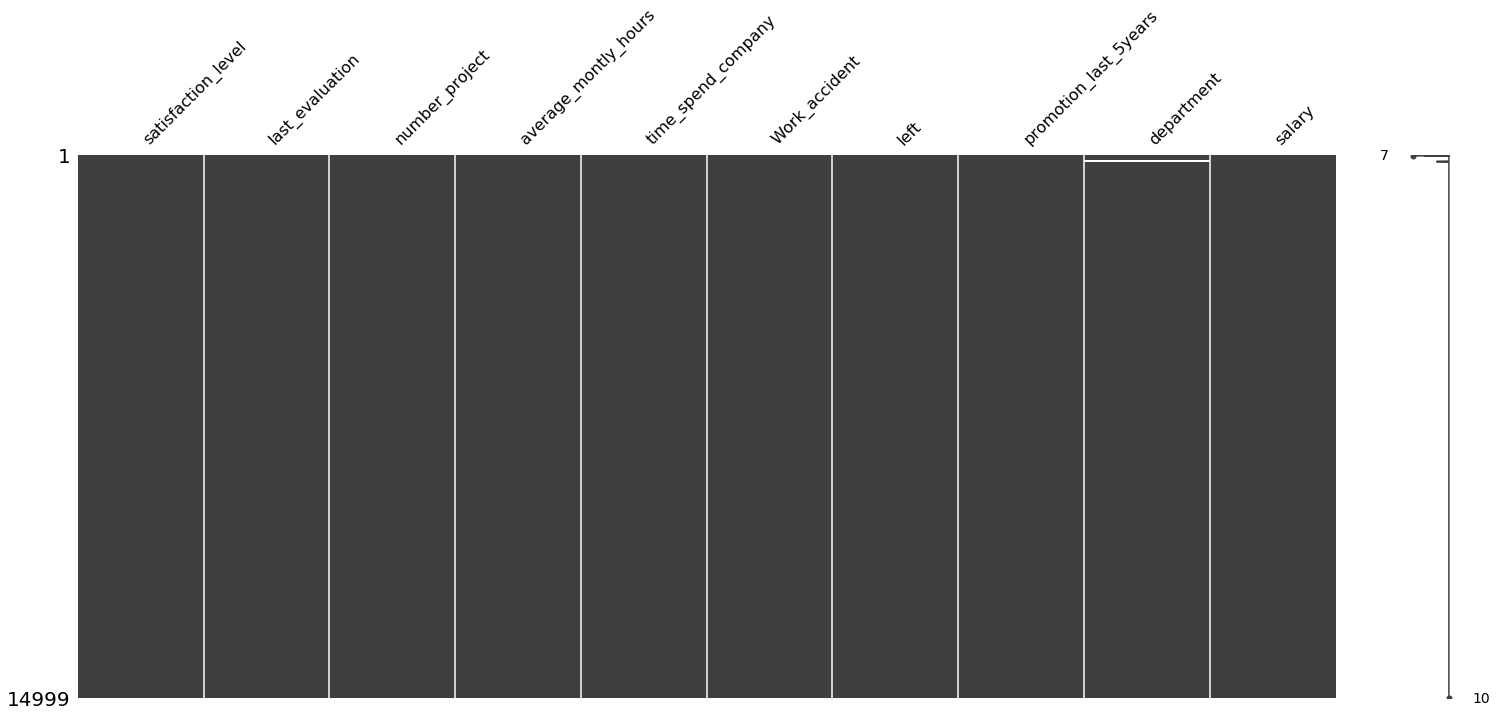

In [46]:
# !pip install missingno
import missingno as msno
msno.matrix(hr_df)
plt.show()

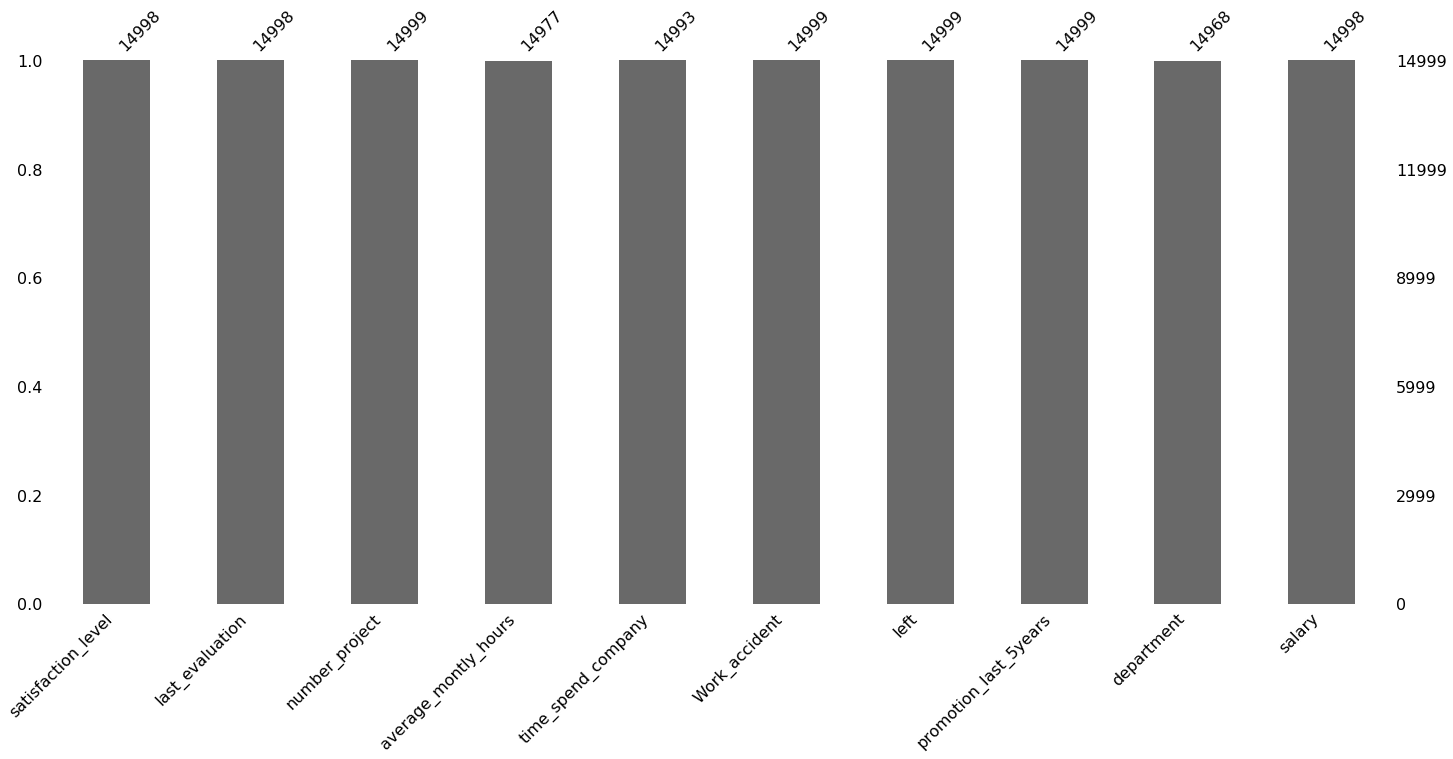

In [40]:
msno.bar(hr_df)
plt.show()

In [49]:
hr_df = hr_df.dropna() # removing missing values rows

In [51]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14946 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14946 non-null float64
last_evaluation          14946 non-null float64
number_project           14946 non-null int64
average_montly_hours     14946 non-null float64
time_spend_company       14946 non-null float64
Work_accident            14946 non-null int64
left                     14946 non-null int64
promotion_last_5years    14946 non-null int64
department               14946 non-null object
salary                   14946 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [53]:
# Summary statistics of all columns including Categorical columns
hr_df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14946,14946
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4119,7278
mean,0.613431,0.716045,3.802221,200.996989,3.496454,0.144989,0.235381,0.021277,NaN,NaN
std,0.248289,0.171088,1.230029,49.881414,1.461227,0.352101,0.424251,0.144310,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Number of people who stayed is higher than who left. There is class imbalance 

In [60]:
hr_df['left'].value_counts()

0    11428
1     3518
Name: left, dtype: int64

Satisfaction level along with last promotion received are strong indicators if the employee is likely to leave/stay in the org

In [61]:
hr_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440034,0.717902,3.852757,207.288516,3.874645,0.047470,0.005117


HR dept has maximum attrition

In [63]:
hr_df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637629,0.704482,3.768608,199.902913,3.693366,0.155340,0.065534,0.058252
low,0.601521,0.716925,3.798434,200.919621,3.435284,0.142759,0.293212,0.008931
medium,0.622257,0.717271,3.812966,201.294776,3.527830,0.145522,0.202581,0.028141


In [78]:
dep_lef_crosstab = pd.crosstab(hr_df.department,hr_df.left)
dep_lef_crosstab

left,0,1
department,,
IT,954,273
RandD,666,121
accounting,563,198
hr,524,210
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,993
support,1674,546


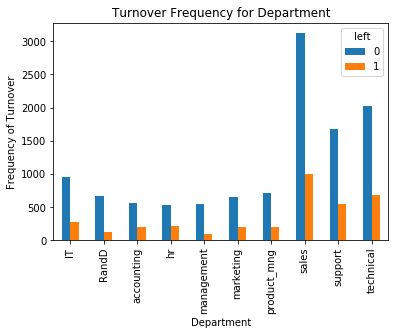

In [79]:
dep_lef_crosstab.plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

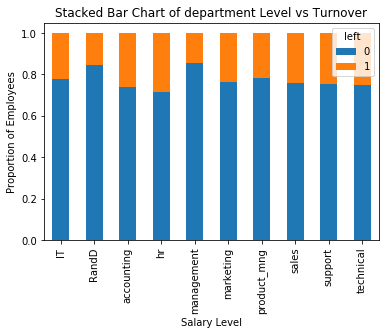

In [80]:
dep_lef_crosstab.div(dep_lef_crosstab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of department Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.show()

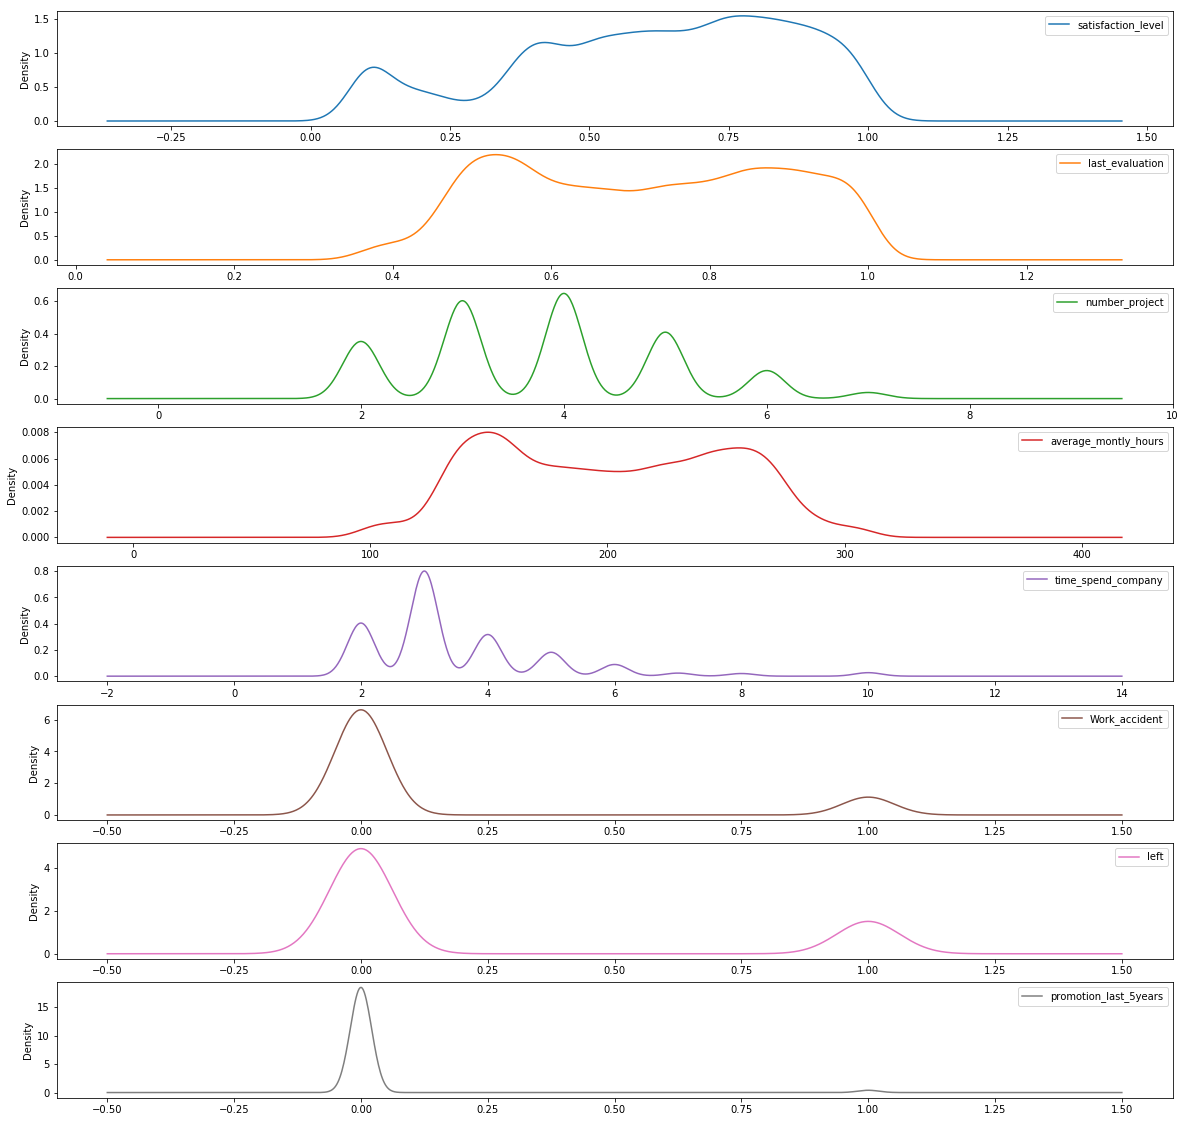

In [107]:
hr_df.plot.density(subplots = True, figsize = (20,20), sharex = False)
plt.show()

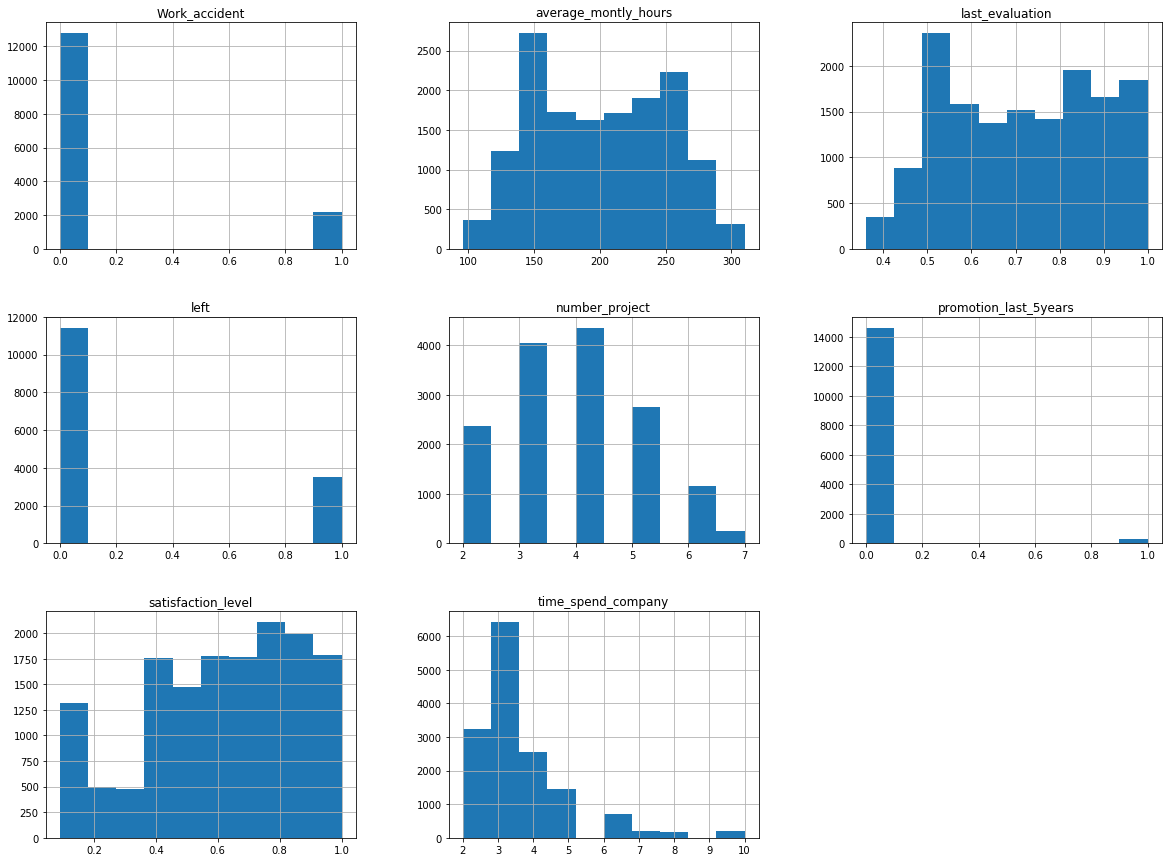

In [109]:
num_bins = 10

hr_df.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [112]:
hr_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.104483,-0.142099,-0.018592,-0.101937,0.057821,-0.387490,0.025676
last_evaluation,0.104483,1.000000,0.347019,0.337451,0.129552,-0.006931,0.006023,-0.008110
number_project,-0.142099,0.347019,1.000000,0.413623,0.195467,-0.004235,0.022796,-0.005318
average_montly_hours,-0.018592,0.337451,0.413623,1.000000,0.125951,-0.009679,0.069983,-0.003021
time_spend_company,-0.101937,0.129552,0.195467,0.125951,1.000000,0.002365,0.143605,0.067946
Work_accident,0.057821,-0.006931,-0.004235,-0.009679,0.002365,1.000000,-0.153673,0.038049
left,-0.387490,0.006023,0.022796,0.069983,0.143605,-0.153673,1.000000,-0.062133
promotion_last_5years,0.025676,-0.008110,-0.005318,-0.003021,0.067946,0.038049,-0.062133,1.000000


Correlation Matrix

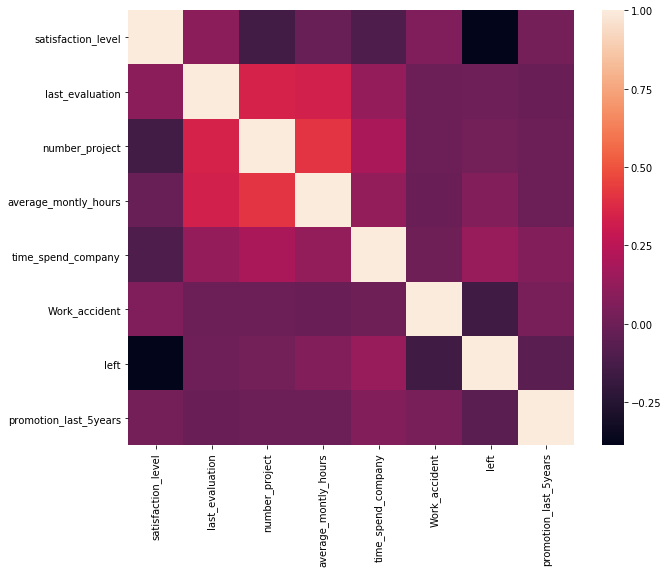

In [144]:
plt.figure(figsize=(10, 8))
sns.heatmap(hr_df.corr())
plt.show()
#from below matrix, number_project and avg_monthly_hrs are strongly correlated, also last_eval and avg_monthly_hrs

### Feature Engineering

Convert the 2 Categorical variable to Numerical variables using 1-hot encoding

In [151]:
print(hr_df.department.unique())
print(hr_df.salary.unique())

['sales' 'hr' 'technical' 'support' 'management' 'IT' 'product_mng'
 'marketing' 'accounting' 'RandD']
['low' 'medium' 'high']


In [152]:
hr_df2 = pd.get_dummies(hr_df, columns=["department", "salary"], prefix=["department", "salary"])

In [154]:
hr_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14946 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level        14946 non-null float64
last_evaluation           14946 non-null float64
number_project            14946 non-null int64
average_montly_hours      14946 non-null float64
time_spend_company        14946 non-null float64
Work_accident             14946 non-null int64
left                      14946 non-null int64
promotion_last_5years     14946 non-null int64
department_IT             14946 non-null uint8
department_RandD          14946 non-null uint8
department_accounting     14946 non-null uint8
department_hr             14946 non-null uint8
department_management     14946 non-null uint8
department_marketing      14946 non-null uint8
department_product_mng    14946 non-null uint8
department_sales          14946 non-null uint8
department_support        14946 non-null uint8
department_technical      14946 non-null uint8
salary_high               14946 non-n

In [ ]:
y = hr_df2['left']

In [ ]:
X = hr_df2

In [ ]:
X.drop('left', axis = 1, inplace = True)

In [166]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14946 entries, 0 to 14998
Data columns (total 20 columns):
satisfaction_level        14946 non-null float64
last_evaluation           14946 non-null float64
number_project            14946 non-null int64
average_montly_hours      14946 non-null float64
time_spend_company        14946 non-null float64
Work_accident             14946 non-null int64
promotion_last_5years     14946 non-null int64
department_IT             14946 non-null uint8
department_RandD          14946 non-null uint8
department_accounting     14946 non-null uint8
department_hr             14946 non-null uint8
department_management     14946 non-null uint8
department_marketing      14946 non-null uint8
department_product_mng    14946 non-null uint8
department_sales          14946 non-null uint8
department_support        14946 non-null uint8
department_technical      14946 non-null uint8
salary_high               14946 non-null uint8
salary_low                14946 non-n

Logistic regression model

In [167]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/sandhya_ajay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 1743 to 2785
Data columns (total 20 columns):
satisfaction_level        10462 non-null float64
last_evaluation           10462 non-null float64
number_project            10462 non-null int64
average_montly_hours      10462 non-null float64
time_spend_company        10462 non-null float64
Work_accident             10462 non-null int64
promotion_last_5years     10462 non-null int64
department_IT             10462 non-null uint8
department_RandD          10462 non-null uint8
department_accounting     10462 non-null uint8
department_hr             10462 non-null uint8
department_management     10462 non-null uint8
department_marketing      10462 non-null uint8
department_product_mng    10462 non-null uint8
department_sales          10462 non-null uint8
department_support        10462 non-null uint8
department_technical      10462 non-null uint8
salary_high               10462 non-null uint8
salary_low                10462 non

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred = model_lr.predict(X_test)

In [184]:
# To check accuracy of model:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7903657448706513

Confusion Matrix ::

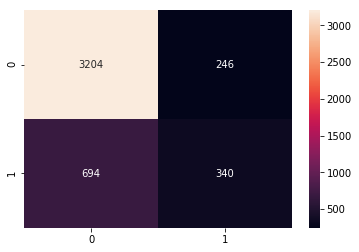

In [195]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f')
plt.show()